In [297]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [298]:
# Ler dados do DataSet
csv_dir = "/content/sample_data/csgo_round_snapshots.csv"
data = pd.read_csv(csv_dir, delimiter=",")

In [299]:
data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [300]:
data.shape

(122410, 97)

In [301]:
data.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [302]:
# Pegar informações para ver se são dados númericos ou precisa ser tratado e se tem nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [303]:
data.nunique()

time_left                    10782
ct_score                        33
t_score                         34
map                              8
bomb_planted                     2
                             ...  
ct_grenade_molotovgrenade        4
t_grenade_molotovgrenade         6
ct_grenade_decoygrenade          4
t_grenade_decoygrenade           3
round_winner                     2
Length: 97, dtype: int64

In [304]:
data['bomb_planted'] = data['bomb_planted'].astype(np.int16)

In [305]:
encoder = LabelEncoder()

data['map'] = encoder.fit_transform(data['map'])
map_mapping = {index : label for index , label in enumerate(encoder.classes_)}

In [306]:
data['round_winner'] = encoder.fit_transform(data['round_winner'])
round_mapping = {index : label for index , label in enumerate(encoder.classes_)}

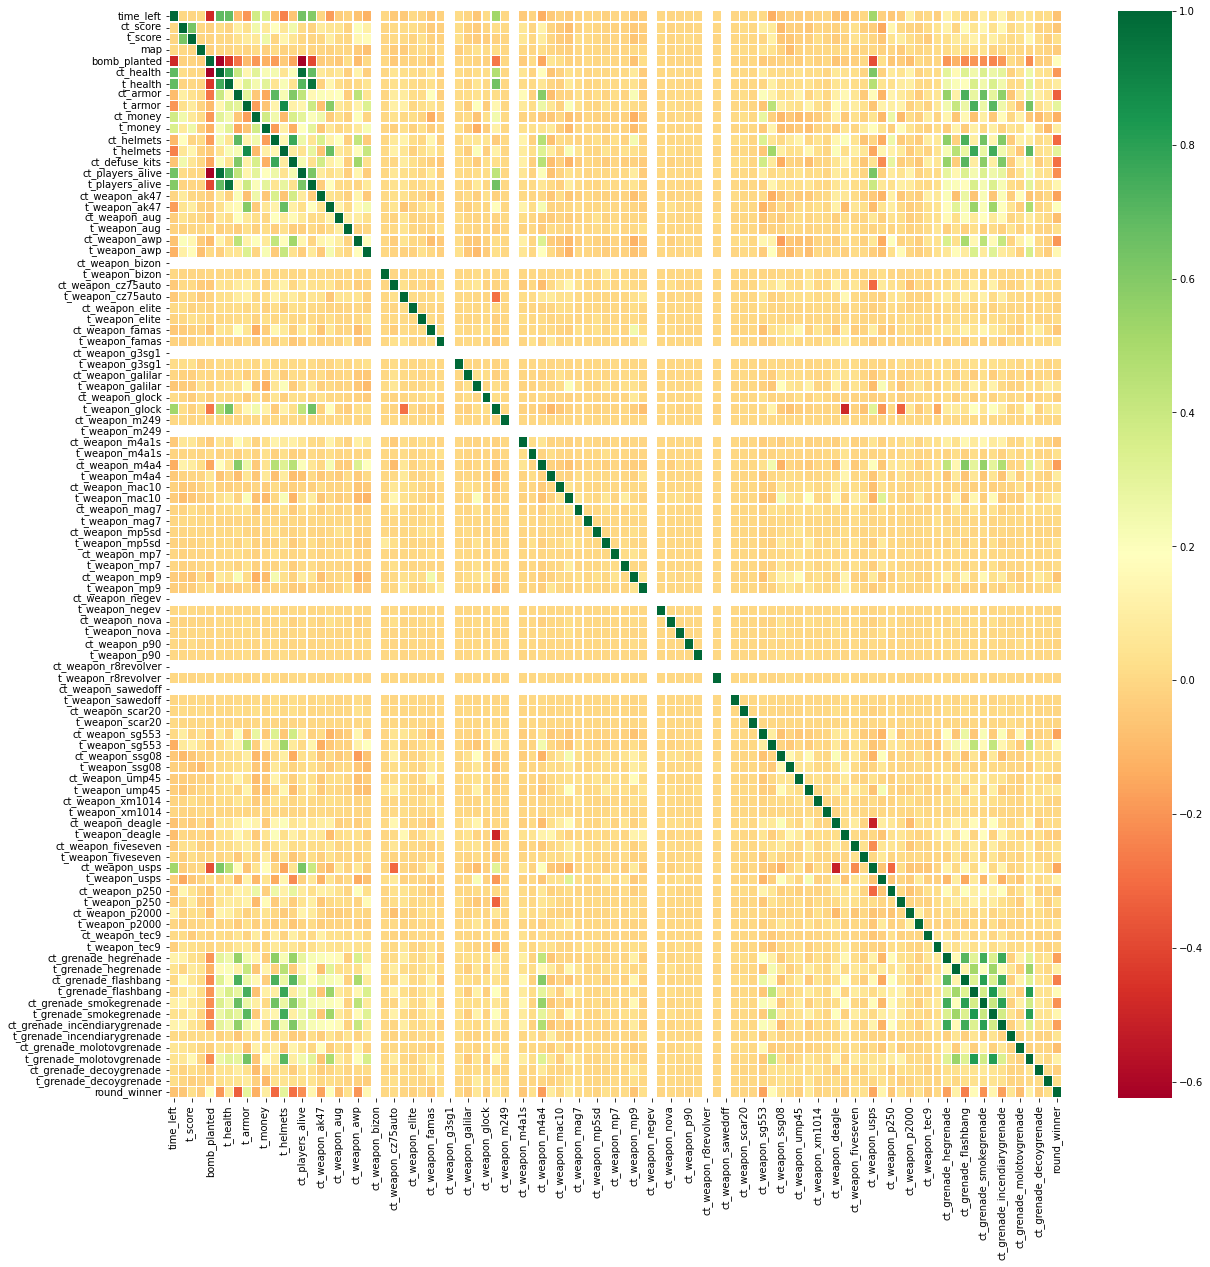

In [307]:
# Correlação
corr = pd.DataFrame(data).corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap ='RdYlGn', linewidths = 0.30)

In [308]:
y = data['round_winner']
X = data.drop('round_winner', axis=1)

In [309]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2)

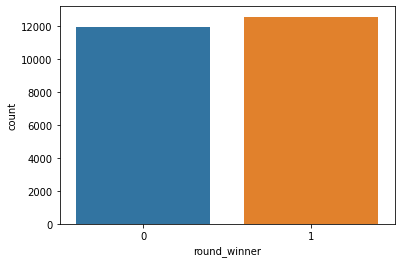

In [310]:
# Ver se os dados estão balanceados
sns.countplot(y_train)

In [311]:
# Criando a árvore e definindo o criterio de criação usando entropia
tree_classifier = DecisionTreeClassifier(criterion="gini")
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [312]:
# Mostrar métricas
print("Accuracy score = ", accuracy_score(y_test, tree_classifier.predict(X_test)))
print(classification_report(y_test, tree_classifier.predict(X_test)))

Accuracy score =  0.7460276938158648
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     48064
           1       0.75      0.75      0.75     49864

    accuracy                           0.75     97928
   macro avg       0.75      0.75      0.75     97928
weighted avg       0.75      0.75      0.75     97928



In [313]:
# Random Forest
rforest = RandomForestClassifier(max_features=3, criterion='gini', random_state=0)
rforest.fit(X_train, y_train)

RandomForestClassifier(max_features=3, random_state=0)

In [314]:
# Mostrar métricas
print('Random Forest')
print("Accuracy score = ", accuracy_score(y_test, rforest.predict(X_test)))
print(classification_report(y_test, rforest.predict(X_test)))

Random Forest
Accuracy score =  0.8058777877624377
              precision    recall  f1-score   support

           0       0.79      0.82      0.81     48064
           1       0.82      0.79      0.81     49864

    accuracy                           0.81     97928
   macro avg       0.81      0.81      0.81     97928
weighted avg       0.81      0.81      0.81     97928

